# Extract source series from World Bank WDI database download

In [2]:
%matplotlib inline 
from IPython.display import display, HTML
from datetime import date
import os
import numpy as np
import zipfile
import pandas as pd

# pandas_datareader spams FutureWarning on import
#import warnings
#warnings.filterwarnings('ignore', module='pandas_datareader')
#from pandas_datareader import wb

# find target path for data files, assuming the notebook is in the right place
data_path = _dh[0]
assert data_path.endswith(os.path.join('em-2020','data'))

In [3]:
zf = zipfile.ZipFile(os.path.join(data_path, 'WDI_csv.zip'))

In [4]:
series = pd.read_csv(zf.open('WDISeries.csv'), index_col='Series Code')

In [61]:
raw_indicators = [
    'EG.GDP.PUSE.KO.PP.KD',
    'EN.POP.DNST',
    'IP.PAT.RESD',
    'IP.PAT.NRES',
    'NV.IND.TOTL.ZS',
    'NE.TRD.GNFS.ZS',
    'NE.IMP.GNFS.KD',
    'NE.EXP.GNFS.KD',
    'NY.GDP.MKTP.KD',
    'NY.GDP.PCAP.KD',
    'IP.PAT.RESD',
    'IP.PAT.NRES',
#     'PA.NUS.FCRF',
]
series.loc[raw_indicators[0:], ['Indicator Name']]


,Indicator Name
Series Code,
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP ...
EN.POP.DNST,Population density (people per sq. km of land ...
IP.PAT.RESD,"Patent applications, residents"
IP.PAT.NRES,"Patent applications, nonresidents"
NV.IND.TOTL.ZS,"Industry, value added (% of GDP)"
NE.TRD.GNFS.ZS,Trade (% of GDP)
NE.IMP.GNFS.KD,Imports of goods and services (constant 2010 US$)
NE.EXP.GNFS.KD,Exports of goods and services (constant 2010 US$)
NY.GDP.MKTP.KD,GDP (constant 2010 US$)


In [6]:
countries = pd.read_csv(zf.open('WDICountry.csv'),  index_col='Country Code')
# countries.loc[['ARB', 'WLD', 'FRA', 'IND'], :]
countries.loc[~countries['Region'].isnull() & countries['National accounts base year'].isnull()]

,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
Country Code,,,,,,,,,,,,,,,,,,,,,
FRO,Faroe Islands,Faroe Islands,Faroe Islands,FO,Danish krone,NaN,Europe & Central Asia,High income,FO,NaN,...,NaN,NaN,2011,NaN,NaN,Yes,NaN,NaN,2017.0,NaN
GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,Europe & Central Asia,High income,GI,NaN,...,NaN,NaN,2012,NaN,NaN,Yes,NaN,NaN,NaN,NaN
MAF,St. Martin (French part),St. Martin (French part),St. Martin (French part),MF,Euro,NaN,Latin America & Caribbean,High income,MF,NaN,...,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0,NaN
PRK,Dem. People's Rep. Korea,"Korea, Dem. People's Rep.",Democratic People's Republic of Korea,KP,Democratic People's Republic of Korean won,NaN,East Asia & Pacific,Low income,KP,NaN,...,NaN,NaN,2019,"Multiple Indicator Cluster Survey, 2017",NaN,NaN,NaN,NaN,2016.0,NaN
VGB,British Virgin Islands,British Virgin Islands,British Virgin Islands,VG,U.S. dollar,NaN,Latin America & Caribbean,High income,VG,NaN,...,NaN,NaN,2010,"STEPS Risk Factor Survey, 2010",NaN,Yes,NaN,NaN,NaN,NaN


In [7]:
country_groups = pd.read_excel(os.path.join(data_path, 'CLASS.xls'), sheet_name='Groups')
country_group_map = {k: set(v['CountryCode']) for k, v in country_groups.groupby('GroupCode')}
all_countries = country_group_map['WLD']
country_group_map['CEB']

{'BGR', 'CZE', 'EST', 'HRV', 'HUN', 'LTU', 'LVA', 'POL', 'ROU', 'SVK', 'SVN'}

In [8]:
data = pd.read_csv(zf.open('WDIData.csv'))

In [9]:
# The last column in the CSV file is empty
data.dropna(axis='columns', how='all', inplace=True)

In [10]:
data.loc[data['Indicator Code'].isin(raw_indicators)].sample(2).iloc[:, -10:]

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
338195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117818,45095.898768,46061.992268,46367.497508,46948.766869,47813.105915,47770.415612,47705.523035,48633.829775,48924.399185,49031.379941


In [11]:
is_country = data['Country Code'].isin(all_countries)
is_world = data['Country Code'] == 'WLD'
other_cols = ['Indicator Name', 'Indicator Code', 'Country Name']

In [12]:
exports = data.loc[is_country & (data['Indicator Code'] == 'NE.EXP.GNFS.CD')].set_index('Country Code').drop(columns=other_cols)
imports = data.loc[is_country & (data['Indicator Code'] == 'NE.IMP.GNFS.CD')].set_index('Country Code').drop(columns=other_cols)
gdp = data.loc[is_country & (data['Indicator Code'] == 'NY.GDP.MKTP.CD')].set_index('Country Code').drop(columns=other_cols)
trade_pct = data.loc[is_country & (data['Indicator Code'] == 'NE.TRD.GNFS.ZS')].set_index('Country Code').drop(columns=other_cols)

In [13]:
actual = imports.add(exports, fill_value=0.) / gdp * 100
(trade_pct.unstack() - actual.unstack()).dropna().sort_values()

      Country Code
2004  SGP            -1.705303e-12
1977  SGP            -1.648459e-12
2015  MLT            -1.591616e-12
2009  HKG            -1.477929e-12
2006  SGP            -1.307399e-12
                          ...     
2017  MLT             1.136868e-12
1975  BRN             1.151079e-12
2014  MLT             1.193712e-12
2018  LUX             1.193712e-12
1982  MAC             1.477929e-12
Length: 8392, dtype: float64

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

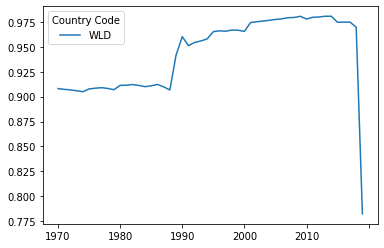

In [14]:
world_imports = data.loc[is_world & (data['Indicator Code'] == 'NE.IMP.GNFS.CD')].set_index('Country Code').drop(columns=other_cols)
world_exports = data.loc[is_world & (data['Indicator Code'] == 'NE.EXP.GNFS.CD')].set_index('Country Code').drop(columns=other_cols)

imports.sum().divide(world_imports).T.dropna().plot()

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

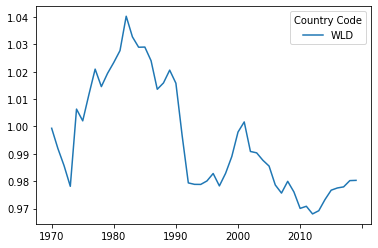

In [15]:
world_imports.divide(world_exports).T.plot()

In [22]:
energy = ['NY.GDP.PCAP.PP.KD',
    'EG.USE.PCAP.KG.OE',
    'EG.GDP.PUSE.KO.PP.KD']
data.loc[is_country & (data['Indicator Code'].isin(energy))].set_index('Country Code')[1980:]

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Code,,,,,,,,,,,,,,,,,,,,,


In [39]:
x = data.loc[is_country & data['Indicator Code'].isin(energy)].set_index(['Country Code', 'Indicator Code']).loc[:, '1980':]
x.head()

1980        1981        1982  \
Country Code Indicator Code                                              
AFG          EG.USE.PCAP.KG.OE             NaN         NaN         NaN   
             NY.GDP.PCAP.PP.KD             NaN         NaN         NaN   
             EG.GDP.PUSE.KO.PP.KD          NaN         NaN         NaN   
ALB          EG.USE.PCAP.KG.OE     1149.536096  989.200148  966.683284   
             NY.GDP.PCAP.PP.KD             NaN         NaN         NaN   

                                          1983         1984        1985  \
Country Code Indicator Code                                               
AFG          EG.USE.PCAP.KG.OE             NaN          NaN         NaN   
             NY.GDP.PCAP.PP.KD             NaN          NaN         NaN   
             EG.GDP.PUSE.KO.PP.KD          NaN          NaN         NaN   
ALB          EG.USE.PCAP.KG.OE     1000.122013  1018.263142  916.555191   
             NY.GDP.PCAP.PP.KD             NaN          NaN         NaN   

                                        1986        1987        1988  \
Country Code Indicator Code                                            
AFG          EG.USE.PCAP.KG.OE           NaN         NaN         NaN   
             NY.GDP.PCAP.PP.KD           NaN         NaN         NaN   
             EG.GDP.PUSE.KO.PP.KD        NaN         NaN         NaN   
ALB          EG.USE.PCAP.KG.OE     963.92717  921.893044  927.744519   
             NY.GDP.PCAP.PP.KD           NaN         NaN         NaN   

                                         1989  ...          2010  \
Country Code Indicator Code                    ...                 
AFG          EG.USE.PCAP.KG.OE            NaN  ...           NaN   
             NY.GDP.PCAP.PP.KD            NaN  ...   2093.743565   
             EG.GDP.PUSE.KO.PP.KD         NaN  ...           NaN   
ALB          EG.USE.PCAP.KG.OE     896.437762  ...    729.154373   
             NY.GDP.PCAP.PP.KD            NaN  ...  10973.412376   

                                           2011          2012          2013  \
Country Code Indicator Code                                                   
AFG          EG.USE.PCAP.KG.OE              NaN           NaN           NaN   
             NY.GDP.PCAP.PP.KD      2037.608607   2220.481526   2264.317575   
             EG.GDP.PUSE.KO.PP.KD           NaN           NaN           NaN   
ALB          EG.USE.PCAP.KG.OE       764.968617    687.896260    801.329975   
             NY.GDP.PCAP.PP.KD     11283.033563  11461.887300  11597.963274   

                                           2014          2015          2016  \
Country Code Indicator Code                                                   
AFG          EG.USE.PCAP.KG.OE              NaN           NaN           NaN   
             NY.GDP.PCAP.PP.KD      2249.253738   2212.750899   2200.764487   
             EG.GDP.PUSE.KO.PP.KD           NaN           NaN           NaN   
ALB          EG.USE.PCAP.KG.OE       808.455840           NaN           NaN   
             NY.GDP.PCAP.PP.KD     11828.232264  12125.931481  12547.928084   

                                           2017          2018          2019  
Country Code Indicator Code                                                  
AFG          EG.USE.PCAP.KG.OE              NaN           NaN           NaN  
             NY.GDP.PCAP.PP.KD      2202.570851   2190.240321   2202.278489  
             EG.GDP.PUSE.KO.PP.KD           NaN           NaN           NaN  
ALB          EG.USE.PCAP.KG.OE              NaN           NaN           NaN  
             NY.GDP.PCAP.PP.KD     13037.010016  13601.303381  13961.796598  

[5 rows x 40 columns]